In [18]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

# 1. Lire un fichier

In [2]:
data = pd.read_csv("netflix_titles.csv", index_col="show_id")
data.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


# 2. Afficher les dimensions du dataframe

In [3]:
data.shape

(6234, 11)

# 3. Compter les films et séries

In [4]:
data.type.value_counts()

Movie      4265
TV Show    1969
Name: type, dtype: int64

# 4. Générer le résumé statistique du dataframe

In [5]:
data.describe(include = "all")

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,6234,6234,4265,5664,5758,6223,6234.00000,6224,6234,6234,6234
unique,2,6172,3301,5469,554,1524,NaN,14,201,461,6226
top,Movie,Oh My Ghost,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,A surly septuagenarian gets another chance at ...
freq,4265,3,18,18,2032,122,NaN,2027,1321,299,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,2013.35932,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,8.81162,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,1925.00000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2013.00000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,2016.00000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,2018.00000,NaN,NaN,NaN,NaN


# 5. Compter les valeurs manquantes 

In [6]:
data.isna().sum()

type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

# 6. Explorer les valeurs manquantes 

In [7]:
data.loc[data["director"].isna()].type.value_counts()

TV Show    1841
Movie       128
Name: type, dtype: int64

# 6 bis

In [8]:
data.loc[data['cast'].isna()].listed_in.value_counts().head()

Documentaries                          148
Documentaries, International Movies     94
Docuseries                              31
Documentaries, Sports Movies            20
Crime TV Shows, Docuseries              19
Name: listed_in, dtype: int64

# 7. Supprimer les lignes dupliquées

In [9]:
data.duplicated().sum()

1

In [10]:
data.drop_duplicates(inplace = True)

# 8. Compter les films/séries produits par les États-Unis et par la France

In [11]:
data[(data["country"]=="France") | (data["country"]=="United States")].shape[0]

2122

# 9. Afficher le contenu le plus vieux disponible sur Netflix

In [12]:
data[(data["release_year"]== data["release_year"].min())]

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
81030762,TV Show,Pioneers: First Women Filmmakers*,NaN,NaN,NaN,"December 30, 2018",1925,TV-PG,1 Season,TV Shows,This collection restores films from women who ...


# 10. Afficher le film avec la durée la plus longue sur Netflix

In [13]:
duree = data[data["type"]=="Movie"]["duration"]
duree = duree.str.replace("min", "")
duree = duree.astype("int")
duree.sort_values(ascending=False)
data.reindex(index=duree.index).head(5)

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...
70304989,Movie,Automata,Gabe Ibáñez,"Antonio Banderas, Dylan McDermott, Melanie Gri...","Bulgaria, United States, Spain, Canada","September 8, 2017",2014,R,110 min,"International Movies, Sci-Fi & Fantasy, Thrillers","In a dystopian future, an insurance adjuster f..."
80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60 min,Stand-Up Comedy,Fabrizio Copano takes audience participation t...


# 11. Étudier les catégories avec le plus de contenu

In [15]:
listed_in = pd.Series(", ".join(data["listed_in"].dropna()).split(", "))
listed_in.value_counts().head()

International Movies      1926
Dramas                    1622
Comedies                  1113
International TV Shows    1001
Documentaries              668
dtype: int64

# 12. afficher les directeur qui produit le + de film/serie

In [16]:
directeur = pd.Series(", ".join(data["director"].dropna()).split(", "))
directeur.value_counts().head(10)

Jan Suter           21
Raúl Campos         19
Marcus Raboy        14
Jay Karas           14
Jay Chapman         12
Martin Scorsese      9
Steven Spielberg     9
David Dhawan         8
Lance Bangs          8
Johnnie To           8
dtype: int64

# 13.Voir si Jan Suter travaille souvent avec les même acteurs

In [17]:
data_real = data[(data["director"].notna())]
data_jan_suter = data_real[(data_real["director"].str.contains("Jan Suter"))]
acteur_jan_suter =pd.Series(", ".join(data_jan_suter["cast"].dropna()).split(", "))
acteur_jan_suter.value_counts().head(5)

Carlos Ballarta                3
Sofía Niño de Rivera           3
Ricardo O'Farrill              2
Sebastián Marcelo Wainraich    1
Malena Pichot                  1
dtype: int64

# 14.Représenter les dix pays qui ont produit le plus de contenus disponibles sur Netflix, avec le nombre de contenus par pays

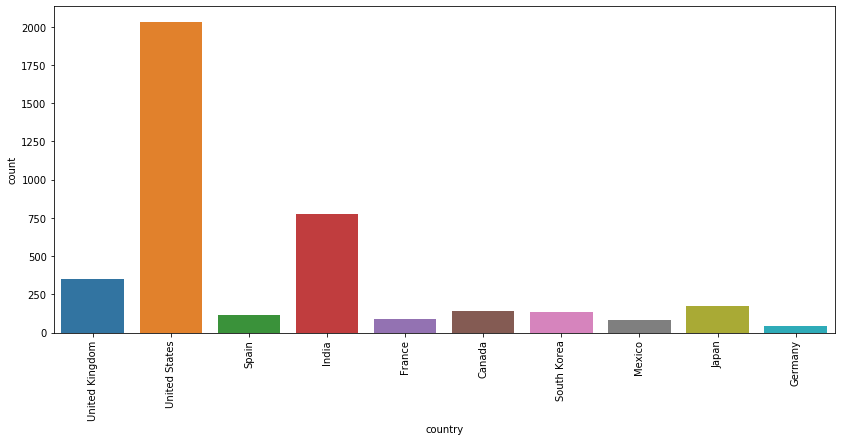

In [19]:
film = pd.Series(", ".join(data["country"].dropna()).split(", "))
film = film.value_counts().head(10)
film10 = data[(data["country"].isin(film.index))]

plt.figure(figsize = [14,6])
sns.countplot(x = "country", data = film10)
plt.xticks(rotation=90)
plt.show()

# 15. Tracer 1 graphe à barre du nbr de films/series par classement de contenu(rating)

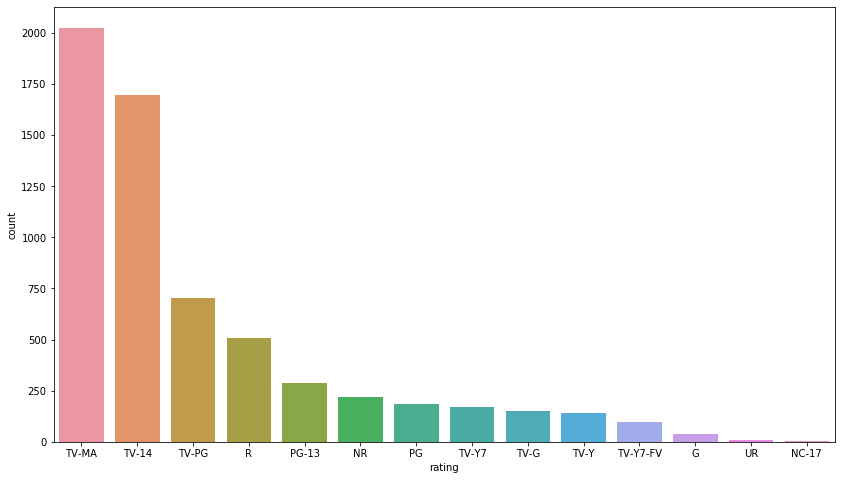

In [20]:
plt.figure(figsize=[14,8])
sns.countplot(x = "rating", data=data,
             order = data["rating"].value_counts().keys())

# 16. Afficher l'évolution du nbr de films/series dispo au cours du temps

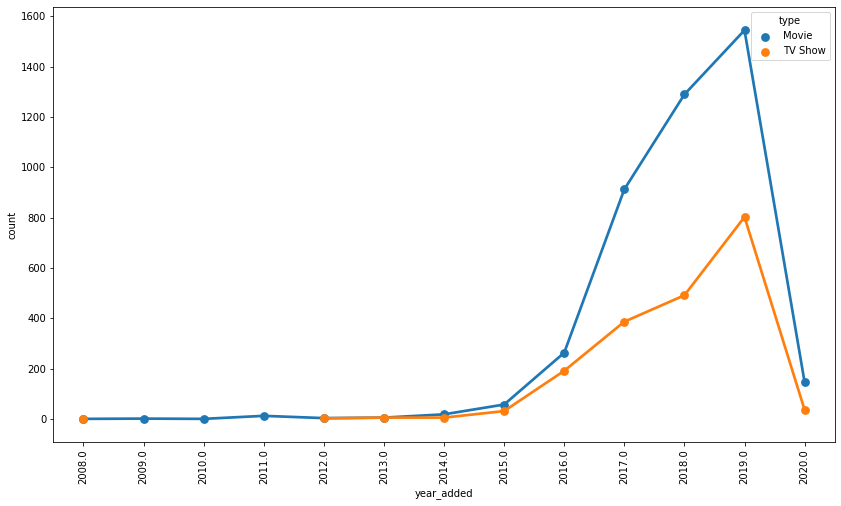

In [21]:
data["year_added"]=pd.to_datetime(data.date_added).dt.year
group = data.groupby(by = ['year_added',"type"]).size().reset_index(name = "count")
plt.figure(figsize=[14,8])
plt.xticks(rotation=90)
sns.pointplot(x= "year_added", y = "count", hue= "type", data =group)


# 17. Afficher la distribution de la durée des films dispo

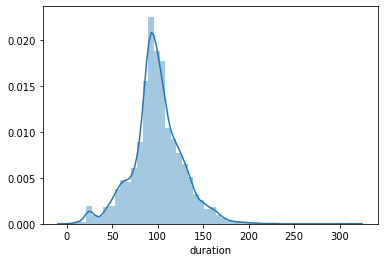

In [22]:
movie = data[(data['type']=='Movie')]
duree = pd.Series(movie['duration']).str.replace("min", "").astype("int").sort_values(ascending=False)
sns.distplot(duree)

# 18. Tracer un graphe représentant le nb de séries par modalité de nbr de saison

Text(0, 0.5, 'Series')

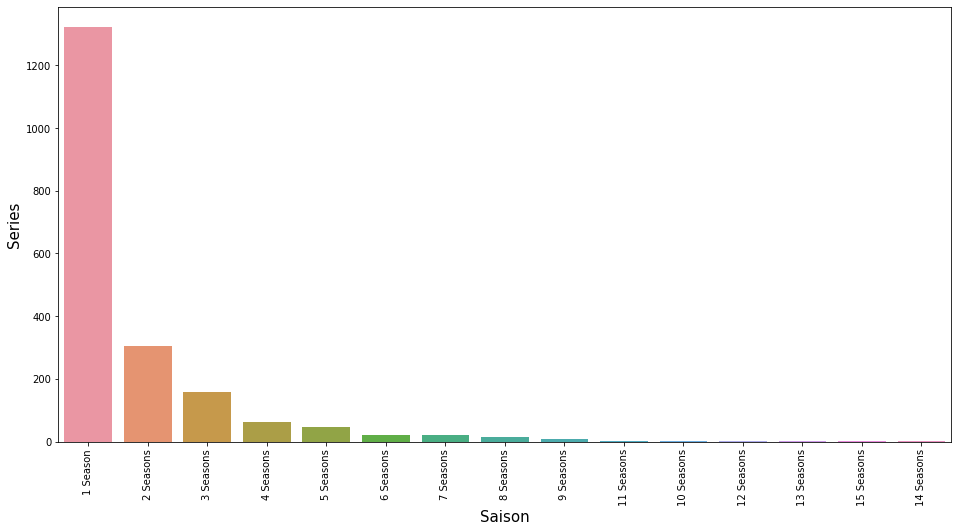

In [23]:
contenu = data[(data["type"]=="TV Show")]
plt.figure(figsize=[16,8])
sns.countplot(x="duration", data=contenu, order=contenu["duration"].value_counts().keys())
plt.xticks(rotation=90)
plt.xlabel("Saison",fontsize=15)
plt.ylabel("Series",fontsize=15)